In [48]:
%load_ext autotime    

time: 249 µs (started: 2021-10-04 16:42:30 +02:00)


In [49]:
import cv2
from os import listdir
from os.path import isfile, join
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import seaborn as sns

import warnings
warnings.simplefilter(action='ignore', category=Warning)

time: 1.5 s (started: 2021-10-04 16:42:31 +02:00)


In [51]:
import glob
my_path = '/Users/soso/Desktop/Projet_8_soutenance/archive/fruits-360_dataset/fruits-360'
files = glob.glob(my_path + '/**/*.jpg', recursive=True)

files_df = pd.DataFrame(files)

from pandas import option_context

with option_context('display.max_colwidth', 400):
    display(files_df.head())

files_df_s1 = files_df[0].str.split('/', expand=True)
files_df_s2 = files_df_s1[[8,9,10]]
files_df_s2 = files_df_s2.rename(columns={8:"folder", 9: "label" ,10:'file'})
files_df_s2




def files_n(x):
    files_test = files_df_s2[files_df_s2["folder"].str.contains(x)]
    print("files labels : ", files_test.shape)
    files_test_label = pd.DataFrame(files_test.label.value_counts())
    files_test_label = files_test_label.reset_index()
    files_test_label = files_test_label.rename(columns={"index":"label", 'label': "counts"})
    return files_test_label

,0
0,/Users/soso/Desktop/Projet_8_soutenance/archive/fruits-360_dataset/fruits-360/Test/Tomato 4/r_226_100.jpg
1,/Users/soso/Desktop/Projet_8_soutenance/archive/fruits-360_dataset/fruits-360/Test/Tomato 4/121_100.jpg
2,/Users/soso/Desktop/Projet_8_soutenance/archive/fruits-360_dataset/fruits-360/Test/Tomato 4/188_100.jpg
3,/Users/soso/Desktop/Projet_8_soutenance/archive/fruits-360_dataset/fruits-360/Test/Tomato 4/153_100.jpg
4,/Users/soso/Desktop/Projet_8_soutenance/archive/fruits-360_dataset/fruits-360/Test/Tomato 4/r_219_100.jpg


time: 1.73 s (started: 2021-10-02 16:53:39 +02:00)


In [56]:
def _graph_histo_(data,x,y, title, figsize, font):
    plt.figure(figsize=(figsize, figsize))
    sns.set(font_scale=font)
    ax = sns.barplot(x=x, y=y, data=data, orient='h', saturation=0.7)
    plt.xticks(rotation=80)
    plt.title(str(title), fontsize=35)
    return plt.show()

time: 773 µs (started: 2021-10-02 16:54:30 +02:00)


# files_test ----------------

files labels :  (22688, 3)


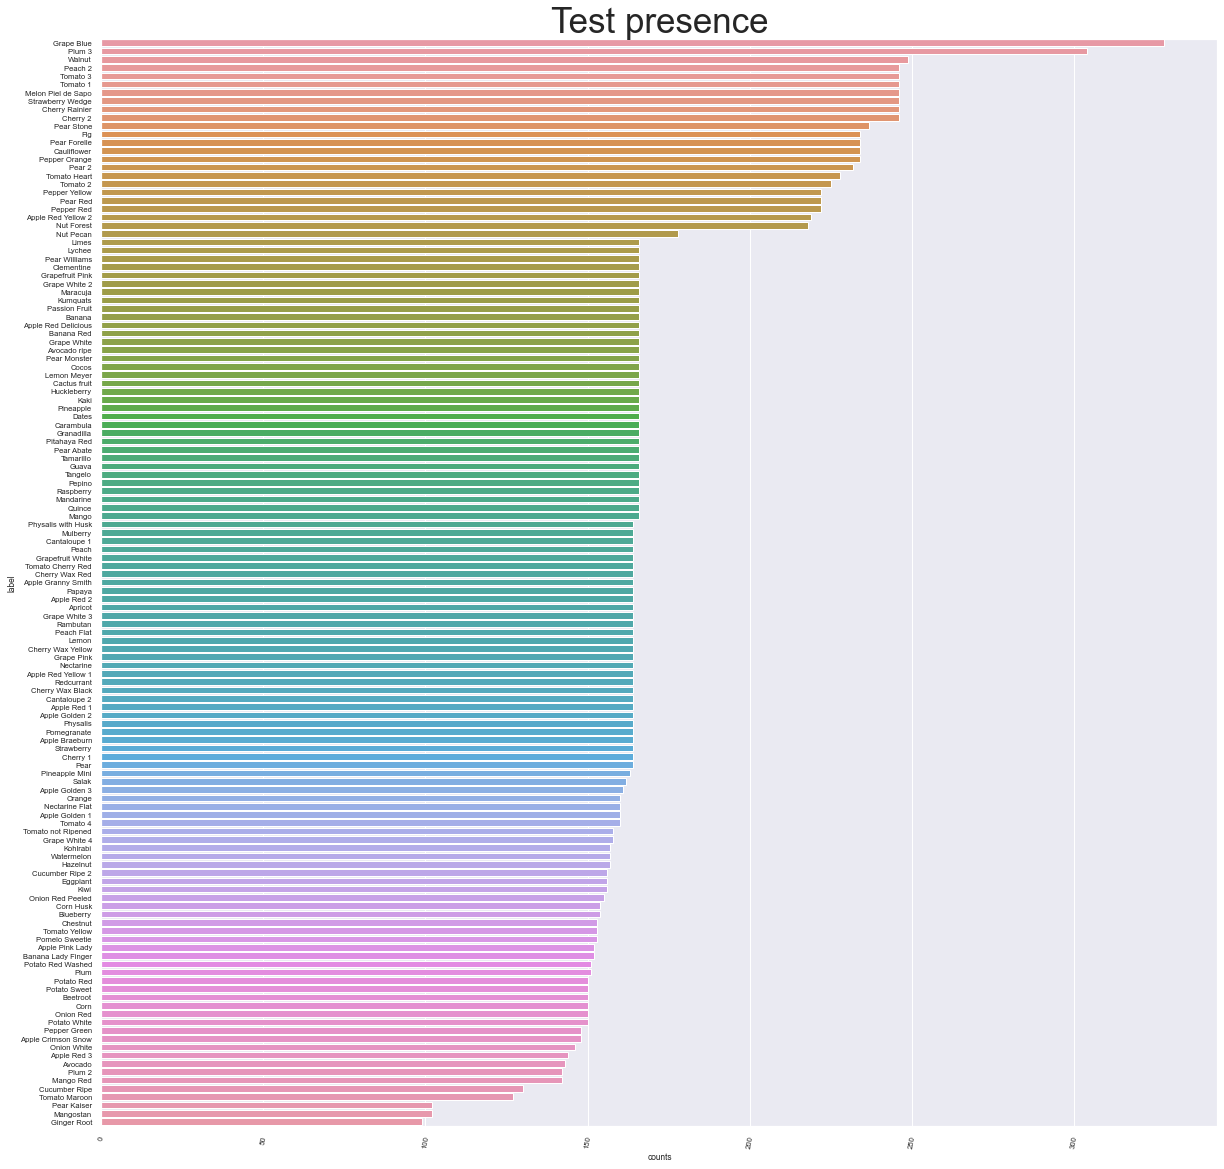

time: 3.04 s (started: 2021-10-02 16:56:38 +02:00)


In [61]:
files_test_label = files_n('Test')
_graph_histo_(files_test_label,"counts","label", "Test presence", 20, 0.7)

# files_train ------

files labels :  (67692, 3)


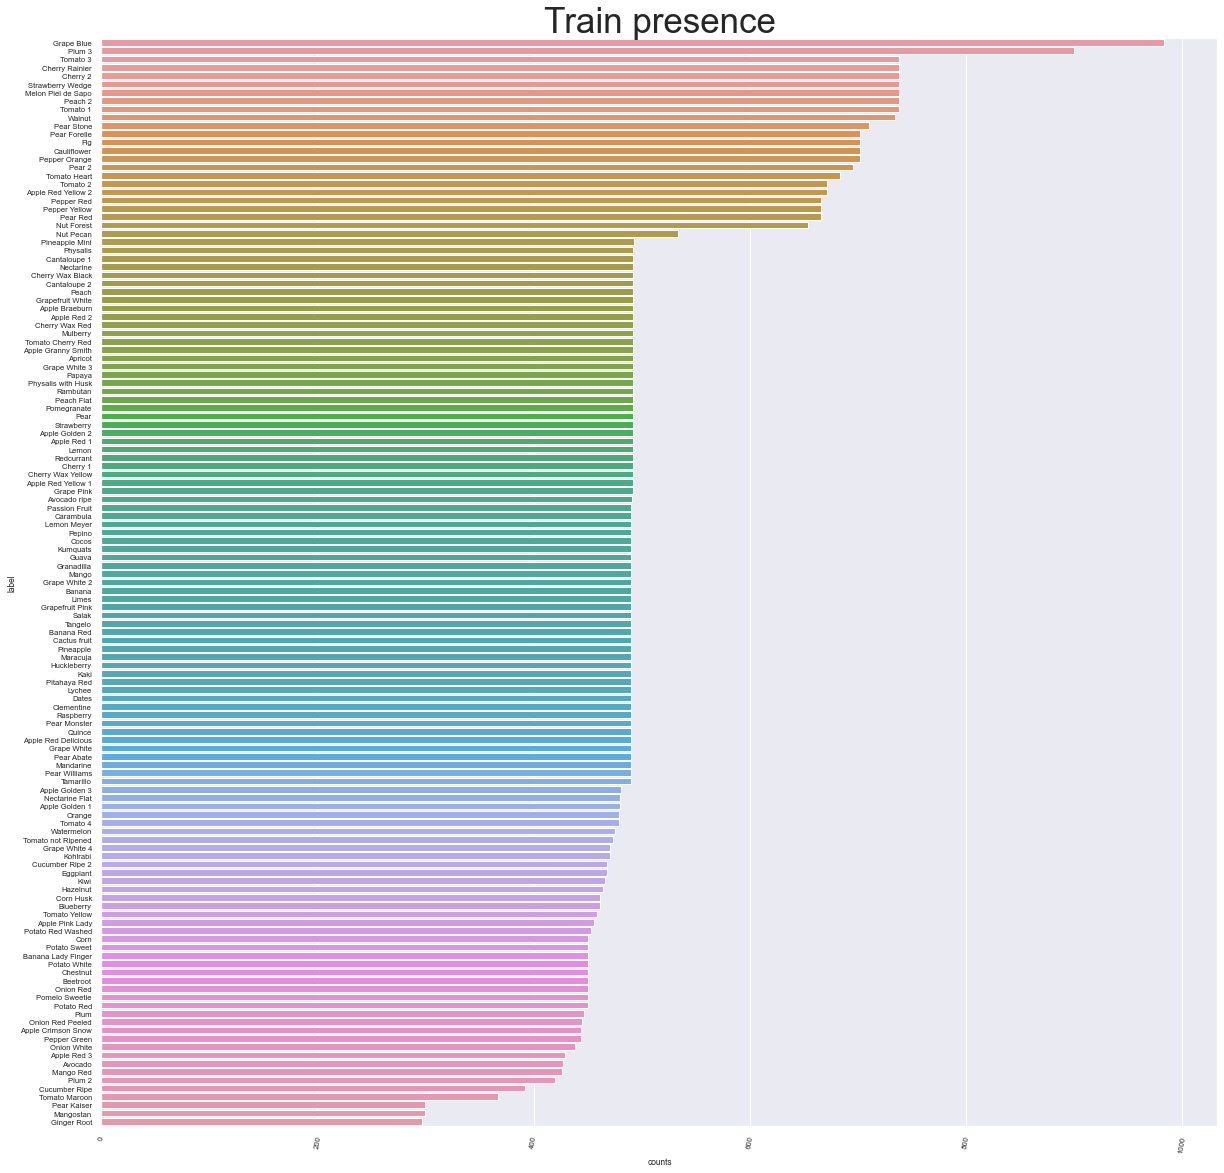

time: 2.85 s (started: 2021-10-02 16:56:53 +02:00)


In [63]:
files_train_label = files_n('Train')
_graph_histo_(files_train_label,"counts","label", "Train presence", 20, 0.7)

# files_multi ------

In [42]:
files_multi_label = files_n('test-multiple_fruits')
files_multi_label

files labels :  (103, 3)


,label,counts
0,raspberry5.jpg,1
1,Bananas(lady_finger)3.jpg,1
2,mangos2.jpg,1
3,grape_pear_mandarine2.jpg,1
4,physalis1.jpg,1
...,...,...
98,tomatoes2.jpg,1
99,cherries(rainier)2.jpg,1
100,tomatoes1.jpg,1
101,chestnut3.jpg,1


time: 88.9 ms (started: 2021-10-02 16:49:31 +02:00)


# Image

In [65]:
def files_n_2(x):
    files_test = files_df_s2[files_df_s2["label"].str.contains(x)]
    print("files labels : ", files_test.shape)
    files_test_label = pd.DataFrame(files_test.label.value_counts())
    files_test_label = files_test_label.reset_index()
    files_test_label = files_test_label.rename(columns={"index":"label", 'label': "counts"})
    return files_test_label

time: 762 µs (started: 2021-10-02 17:01:23 +02:00)


In [78]:
files_img_1 = files_df_s2[files_df_s2["label"].str.contains('Corn Husk')]
files_img_1['path'] = files_img_1['folder'] + '/' + files_img_1['label'] + "/" + files_img_1['file']

time: 71.9 ms (started: 2021-10-02 17:05:07 +02:00)


In [79]:
files_img_1

,folder,label,file,path
13015,Test,Corn Husk,247_100.jpg,Test/Corn Husk/247_100.jpg
13016,Test,Corn Husk,257_100.jpg,Test/Corn Husk/257_100.jpg
13017,Test,Corn Husk,r_150_100.jpg,Test/Corn Husk/r_150_100.jpg
13018,Test,Corn Husk,r_140_100.jpg,Test/Corn Husk/r_140_100.jpg
13019,Test,Corn Husk,r_132_100.jpg,Test/Corn Husk/r_132_100.jpg
...,...,...,...,...
61972,Training,Corn Husk,230_100.jpg,Training/Corn Husk/230_100.jpg
61973,Training,Corn Husk,r_251_100.jpg,Training/Corn Husk/r_251_100.jpg
61974,Training,Corn Husk,156_100.jpg,Training/Corn Husk/156_100.jpg
61975,Training,Corn Husk,146_100.jpg,Training/Corn Husk/146_100.jpg


time: 15.6 ms (started: 2021-10-02 17:05:08 +02:00)


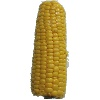

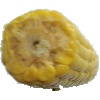

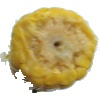

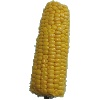

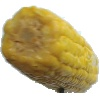

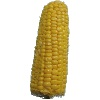

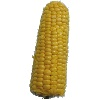

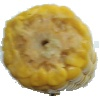

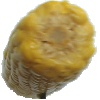

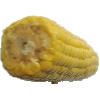

time: 119 ms (started: 2021-10-02 17:10:28 +02:00)


In [86]:
import IPython.display as dp

import random

lst = ['Test/Corn Husk/r_140_100.jpg', 'Training/Corn Husk/r_251_100.jpg', 'Training/Corn Husk/156_100.jpg']

# create list of image objects
images = []
for ea in lst:
    ea = '/Users/soso/Desktop/Projet_8_soutenance/archive/fruits-360_dataset/fruits-360/' + ea




# collect all .png files in ssample dir
fs = !ls /Users/soso/Desktop/Projet_8_soutenance/archive/fruits-360_dataset/fruits-360/Test/Corn/*.jpg

# create list of image objects
images = []
for ea in fs:
    images.append(dp.Image(filename=ea, format='png'))

# display all images
k=0
random.shuffle(images)
for ea in images:
    if k<10:
        dp.display_png(ea)
    else:
        break
    k+=1

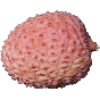

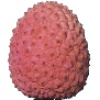

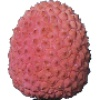

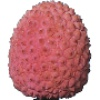

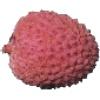

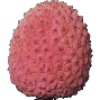

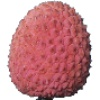

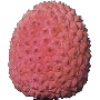

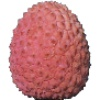

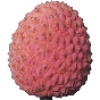

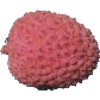

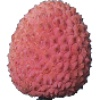

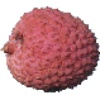

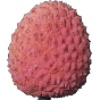

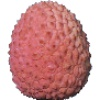

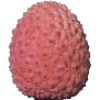

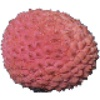

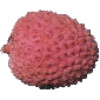

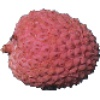

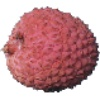

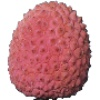

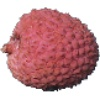

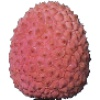

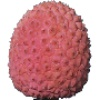

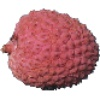

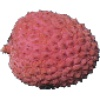

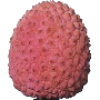

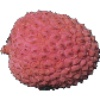

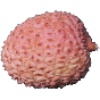

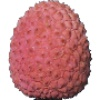

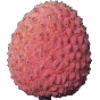

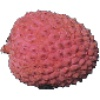

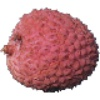

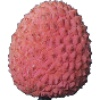

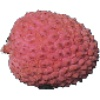

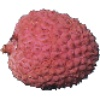

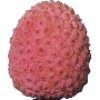

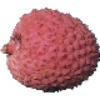

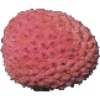

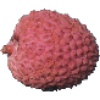

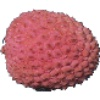

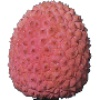

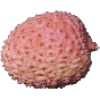

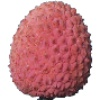

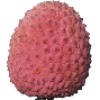

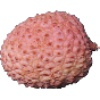

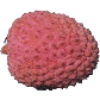

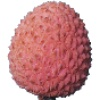

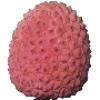

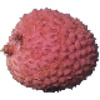

time: 308 ms (started: 2021-10-02 17:18:05 +02:00)


In [100]:
import IPython.display as dp
import random



# collect all .png files in ssample dir
fs = !ls /Users/soso/Desktop/Projet_8_soutenance/archive/fruits-360_dataset/fruits-360/Test/Lychee/*.jpg

# create list of image objects
images = []
for ea in fs:
    images.append(dp.Image(filename=ea, format='png'))

# display all images
k=0
random.shuffle(images)
for ea in images:
    if k<50:
        dp.display_png(ea)
    else:
        break
    k+=1

# Check DF

In [71]:
import pandas as pd

data = pd.read_csv('/Users/soso/Desktop/Projet_8_soutenance/AWS - EC2 - IAM - S3/aws_df.csv')
data.pop('Unnamed: 0')
data.head(5)

,target_Idx,feat_reduit,path
0,1.0,"[-56.902647732996215,-102.05007798009594,-18.3...",s3a://sosop8/sampleaws/Banana/r_322_100.jpg
1,3.0,"[42.15644351327161,40.554428359570416,-49.8078...",s3a://sosop8/sampleaws/Tomato/0_100.jpg
2,1.0,"[-106.56696673201677,-206.24992662813716,-67.7...",s3a://sosop8/sampleaws/Banana/r_79_100.jpg
3,0.0,"[28.911439717796775,2.5067991804536245,64.6365...",s3a://sosop8/sampleaws/Avocado/r_307_100.jpg
4,2.0,"[38.33173826280975,7.06829127888658,27.7109173...",s3a://sosop8/sampleaws/Plum/r_309_100.jpg


time: 19.9 ms (started: 2021-10-04 17:15:38 +02:00)


In [43]:
data_2 = data['feat_reduit'].str.split(",", n=10, expand=True)
data_2[0] = data_2[0].str.replace(r'\[', '')
data_2[7] = data_2[7].str.replace(r'\]', '')

for i in range (0,8):
    data_2[i] = data_2[i].astype(float)
    
    
data_2.dtypes

<ipython-input-43-bbbfa55b6720>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  data_2[0] = data_2[0].str.replace(r'\[', '')
<ipython-input-43-bbbfa55b6720>:3: FutureWarning: The default value of regex will change from True to False in a future version.
  data_2[7] = data_2[7].str.replace(r'\]', '')


0    float64
1    float64
2    float64
3    float64
4    float64
5    float64
6    float64
7    float64
dtype: object

In [44]:
data_3 = data_2.rename(columns={0: "v_0",   1: "v_1" ,  2: "v_2",   3: "v_3" ,  4: "v_4",   5: "v_5" ,  6: "v_6",   7: "v_7" })
data_3

,v_0,v_1,v_2,v_3,v_4,v_5,v_6,v_7
0,-56.902648,-102.050078,-18.346219,12.379280,-8.280287,-7.242451,14.547586,-2.277680
1,42.156444,40.554428,-49.807864,-40.923204,-185.845937,55.428931,-88.442563,37.025326
2,-106.566967,-206.249927,-67.739897,58.565947,-0.002883,-0.616824,-16.458121,15.139085
3,28.911440,2.506799,64.636507,-60.490496,24.443329,17.135311,29.736392,32.384731
4,38.331738,7.068291,27.710917,4.066071,-21.780436,-3.578045,59.229621,22.796893
5,97.018523,42.614513,76.727732,218.103573,16.175687,4.716879,-44.002823,-21.104202
6,73.682561,81.285340,-222.542974,-3.246946,102.231432,-6.697522,-6.627644,18.619495
7,45.190917,5.806158,56.268949,-16.880253,-1.182147,-31.378858,94.607084,121.345341
8,-248.282527,158.961162,22.779425,18.183557,11.598839,-1.165033,-4.760624,0.295768
9,32.654779,-8.680520,51.125405,-79.677902,13.989841,-171.935299,-82.797798,-44.352582


In [45]:
data_def = data.join(data_3)

In [46]:
data_def

,target_Idx,feat_reduit,path,v_0,v_1,v_2,v_3,v_4,v_5,v_6,v_7
0,1.0,"[-56.902647732996215,-102.05007798009594,-18.3...",s3a://sosop8/sampleaws/Banana/r_322_100.jpg,-56.902648,-102.050078,-18.346219,12.379280,-8.280287,-7.242451,14.547586,-2.277680
1,3.0,"[42.15644351327161,40.554428359570416,-49.8078...",s3a://sosop8/sampleaws/Tomato/0_100.jpg,42.156444,40.554428,-49.807864,-40.923204,-185.845937,55.428931,-88.442563,37.025326
2,1.0,"[-106.56696673201677,-206.24992662813716,-67.7...",s3a://sosop8/sampleaws/Banana/r_79_100.jpg,-106.566967,-206.249927,-67.739897,58.565947,-0.002883,-0.616824,-16.458121,15.139085
3,0.0,"[28.911439717796775,2.5067991804536245,64.6365...",s3a://sosop8/sampleaws/Avocado/r_307_100.jpg,28.911440,2.506799,64.636507,-60.490496,24.443329,17.135311,29.736392,32.384731
4,2.0,"[38.33173826280975,7.06829127888658,27.7109173...",s3a://sosop8/sampleaws/Plum/r_309_100.jpg,38.331738,7.068291,27.710917,4.066071,-21.780436,-3.578045,59.229621,22.796893
5,2.0,"[97.01852274843304,42.61451273770002,76.727731...",s3a://sosop8/sampleaws/Plum/r_164_100.jpg,97.018523,42.614513,76.727732,218.103573,16.175687,4.716879,-44.002823,-21.104202
6,3.0,"[73.68256060359799,81.28534038347266,-222.5429...",s3a://sosop8/sampleaws/Tomato/r_97_100.jpg,73.682561,81.285340,-222.542974,-3.246946,102.231432,-6.697522,-6.627644,18.619495
7,2.0,"[45.19091705180252,5.806157867737954,56.268949...",s3a://sosop8/sampleaws/Plum/13_100.jpg,45.190917,5.806158,56.268949,-16.880253,-1.182147,-31.378858,94.607084,121.345341
8,1.0,"[-248.28252710212428,158.96116201863205,22.779...",s3a://sosop8/sampleaws/Banana/0_100.jpg,-248.282527,158.961162,22.779425,18.183557,11.598839,-1.165033,-4.760624,0.295768
9,0.0,"[32.65477913682406,-8.68051966066593,51.125405...",s3a://sosop8/sampleaws/Avocado/0_100.jpg,32.654779,-8.680520,51.125405,-79.677902,13.989841,-171.935299,-82.797798,-44.352582


(12, 2)


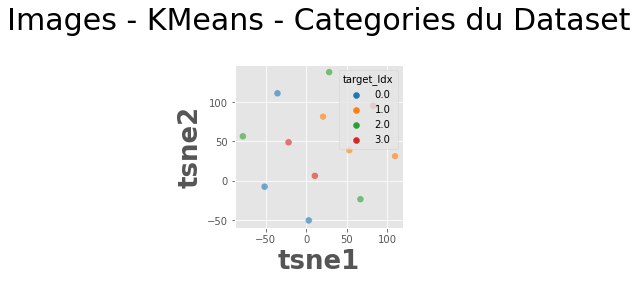

time: 1.09 s (started: 2021-10-04 16:45:59 +02:00)


In [63]:
# 2 - T-Sne 
from sklearn import manifold, decomposition
tsne = manifold.TSNE(n_components=2, perplexity=30, n_iter=2000, init='random', random_state=6)
X_tsne = tsne.fit_transform(data_3)

df_tsne = pd.DataFrame(X_tsne[:,0:2], columns=['tsne1', 'tsne2'])
#df_tsne["class"] = mData_p1["Category"]
print(df_tsne.shape)

y = data_def.target_Idx

X_ri = df_tsne.join(y)
X_ri.target_Idx.value_counts()

plt.figure(figsize=(3,3))
sns.scatterplot(
    x="tsne1", y="tsne2", hue="target_Idx", data=X_ri,
    palette=sns.color_palette('tab10', n_colors=4), s=50, alpha=0.6)

plt.title('Images - KMeans - Categories du Dataset' , fontsize = 30, pad = 35)
plt.xlabel('tsne1', fontsize = 26, fontweight = 'bold')
plt.ylabel('tsne2', fontsize = 26, fontweight = 'bold')
#plt.legend(prop={'size': 14}) 

plt.show()


In [68]:
# 2 - PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(data_3)
df_pca = pd.DataFrame(X_pca[:,0:2], columns=['pca_1', 'pca_2'])

time: 2.89 ms (started: 2021-10-04 16:49:43 +02:00)


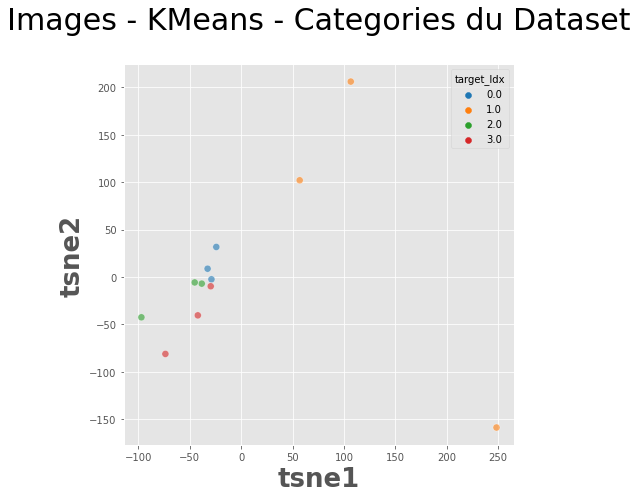

time: 398 ms (started: 2021-10-04 16:50:28 +02:00)


In [70]:
y = data_def.target_Idx

X_ri = df_pca.join(y)
X_ri.target_Idx.value_counts()

plt.figure(figsize=(7,7))
sns.scatterplot(
    x="pca_1", y="pca_2", hue="target_Idx", data=X_ri,
    palette=sns.color_palette('tab10', n_colors=4), s=50, alpha=0.6)

plt.title('Images - KMeans - Categories du Dataset' , fontsize = 30, pad = 35)
plt.xlabel('tsne1', fontsize = 26, fontweight = 'bold')
plt.ylabel('tsne2', fontsize = 26, fontweight = 'bold')
#plt.legend(prop={'size': 14}) 

plt.show()


time: 646 µs (started: 2021-10-04 16:43:34 +02:00)


1.0    3
3.0    3
0.0    3
2.0    3
Name: target_Idx, dtype: int64

time: 10.9 ms (started: 2021-10-04 16:43:47 +02:00)


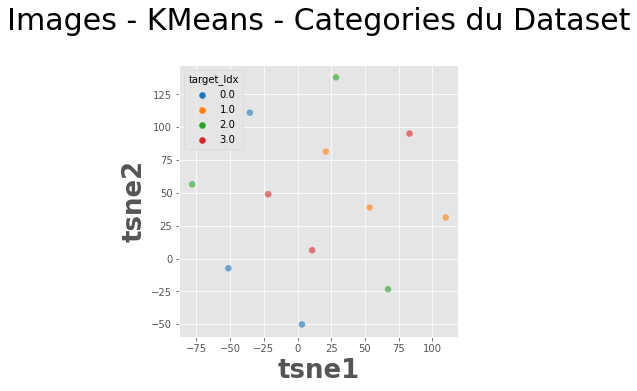

time: 364 ms (started: 2021-10-04 16:44:47 +02:00)
